# Fiddling with CII 1334 stacks from QPQ9 NIR 

In [1]:
%matplotlib inline

In [30]:
# imports
from __future__ import print_function,absolute_import,division,unicode_literals
import numpy as np
import glob,os,sys,copy 
from scipy import stats as scistats
import matplotlib as mpl
mpl.rcParams['font.family']='stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import QTable,Table
from astropy.io import ascii,fits
from astropy import units as u
from astropy import constants as const
from linetools.spectralline import AbsLine
from xastropy.igm.abs_sys import abssys_utils as abssys
from xastropy import spec as xpsec
from xastropy.plotting import utils as xputils
from xastropy.xutils import xdebug as xdb
from xastropy.obs import radec as xor
from xastropy.atomic import ionization as xai
sys.path.append(os.path.abspath("../../../../py"))
from enigma.qpq import utils as qpqutils
from enigma.qpq import spec as qpqs
from enigma.qpq import stacks as qpqk
sys.path.append(os.path.abspath("../Bootstrap/py"))
import qpq9_boot as qpq9b
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k

## Load stack_tup

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
length of sample after and before culling 81 692
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using

/Users/lwymarie/python/specdb/specdb/specdb.py:89: UserWarning: No sources found at your coordinate.  Returning none
  warnings.warn("No sources found at your coordinate.  Returning none")


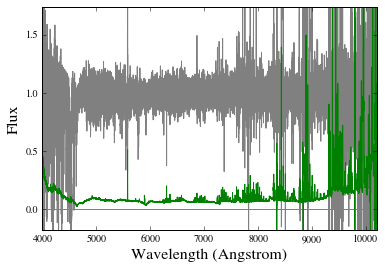

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034139.19-000012.7_b1200_F.fits.gz
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ034139.19-000012.7_F.fits.gz for SDSSJ0341-0000
S/N 45.1738324527 1 / Angstrom


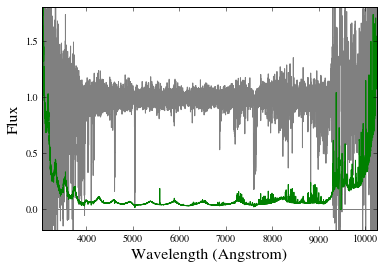

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ075259.14+401118.4.fits.gz for SDSSJ0752+4011
S/N 6.86512524048 1 / Angstrom


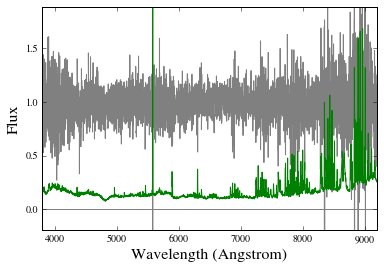

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N 75.0359170696 1 / Angstrom


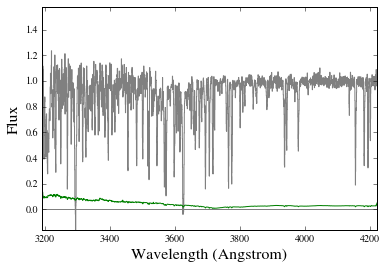

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ080948.22+453929.0.fits for BOSSJ0809+4539
S/N 4.49896022502 1 / Angstrom


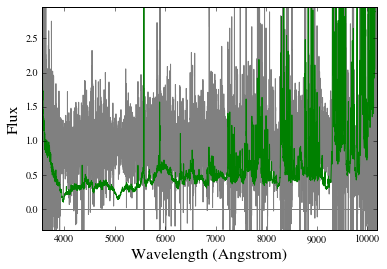

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082844.87+454518.2_b1200_F.fits.gz for SDSSJ0828+4545
S/N 26.1307452153 1 / Angstrom


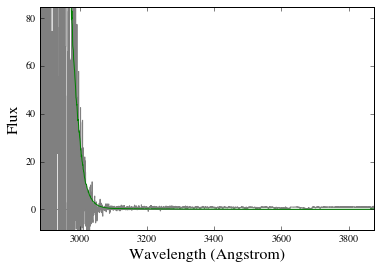

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.13+383722.4_b1200_F.fits.gz for APOJ0837+3837
S/N 24.5031563117 1 / Angstrom


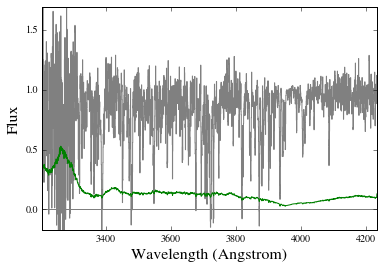

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
S/N 49.1731709574 1 / Angstrom


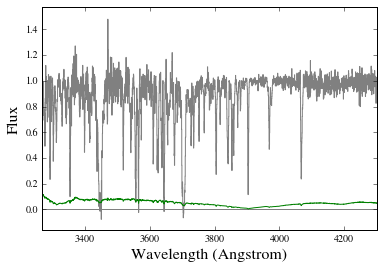

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084257.38+473342.7_b1200_F.fits.gz
No spectrum found for BOSSJ0842+4733 and wvobs=3405.99 Angstrom!
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI

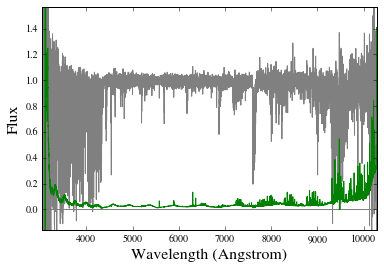

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
S/N is estimated a

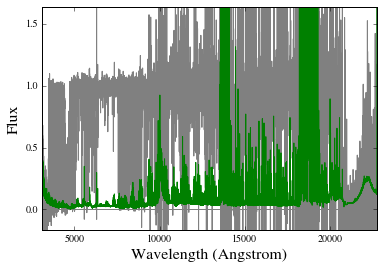

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091553.38+011911.3.fits for BOSSJ0915+0119
S/N 6.70914945491 1 / Angstrom


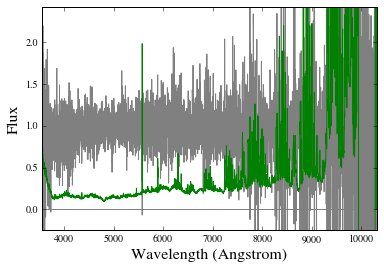

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092416.73+392914.6_b1200_F.fits.gz for APOJ0924+3929
S/N 61.0004815303 1 / Angstrom


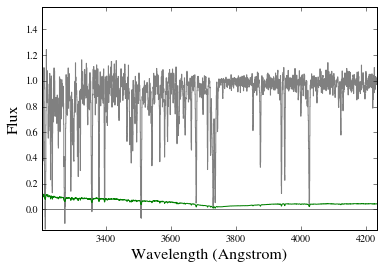

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N 59.8322852369 1 / Angstrom


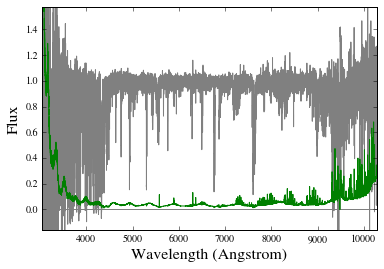

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ093804.84+531743.0_b1200_F.fits.gz for APOJ0938+5317
S/N 74.742049199 1 / Angstrom


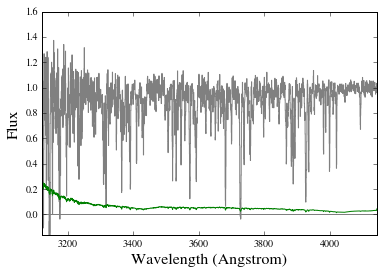

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ095641.74+024840.8.fits for BOSSJ0956+0248
S/N 3.36136798222 1 / Angstrom


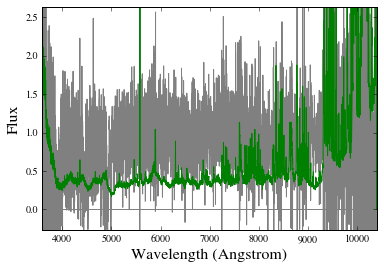

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ100247.14+002053.0.fits for BOSSJ1002+0020
S/N 2.25850551387 1 / Angstrom


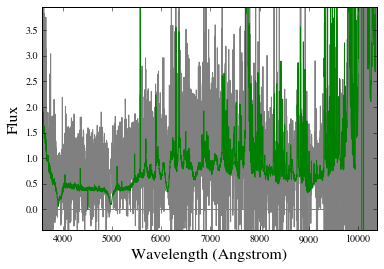

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100507.08+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N 52.7244276535 1 / Angstrom


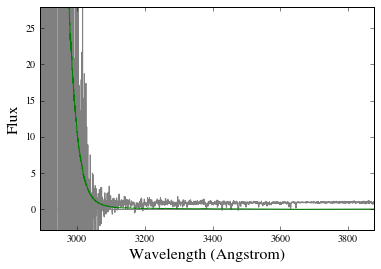

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100627.10+480429.9.fits for BOSSJ1006+4804
S/N 16.8652343521 1 / Angstrom


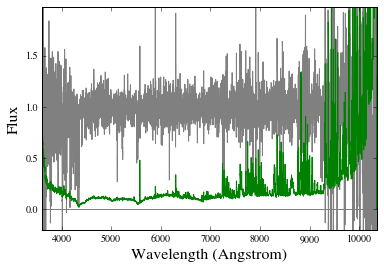

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100940.58+250053.9_b1200_F.fits.gz for APOJ1009+2500
S/N 47.7730560137 1 / Angstrom


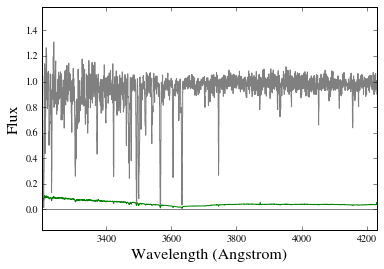

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ10261

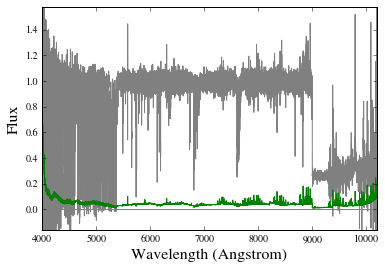

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_b400_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
S/N 64.9694788715 1 / Angstrom


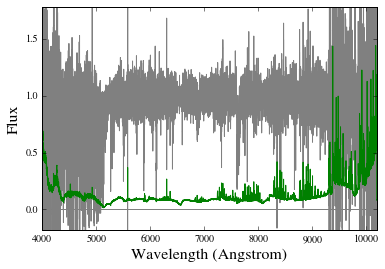

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the D

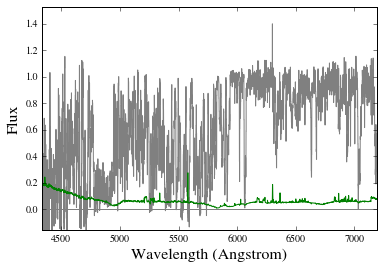

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ114436.66+095904.9_F.fits.gz for BOSSJ1144+0959
S/N 171.406440037 1 / Angstrom


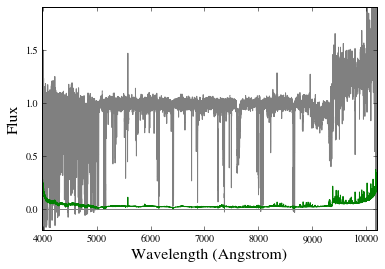

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114546.22+032251.9_b1200_F.fits.gz
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ114546.22+032251.9_F.fits.gz for BOSSJ1145+0322
S/N 68.2526872478 1 / Angstrom


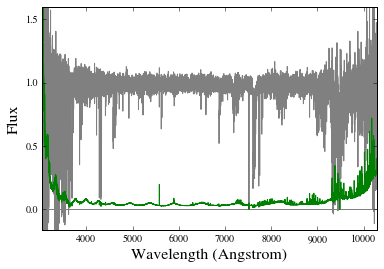

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz for BOSSJ1204+0221
S/N 386.536517315 1 / Angstrom


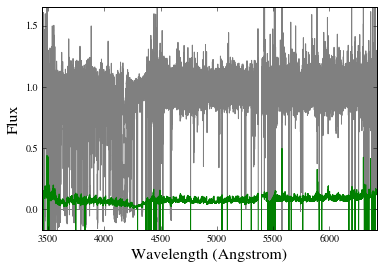

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ123141.73+002913.9_b600_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ123141.73+002913.9_b400_F.fits.gz
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ123141.73+002913.9_F.fits.gz for BOSSJ1231+0029


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:858: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


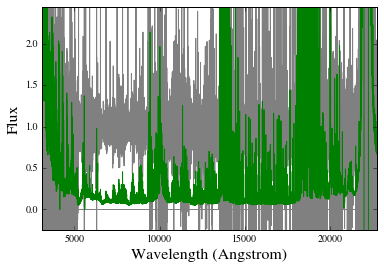

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the D

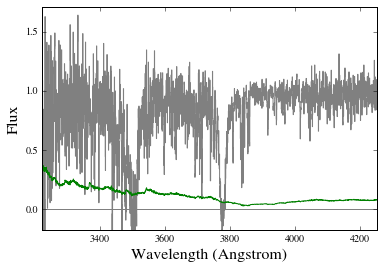

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dr

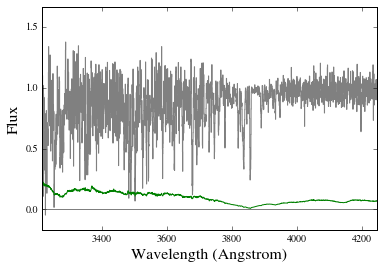

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.55+273756.9_b1200_F.fits.gz for APOJ1358+2737
S/N 43.8609060485 1 / Angstrom


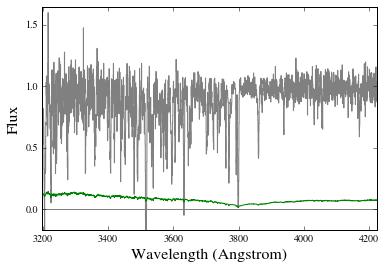

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N 46.3661168562 1 / Angstrom


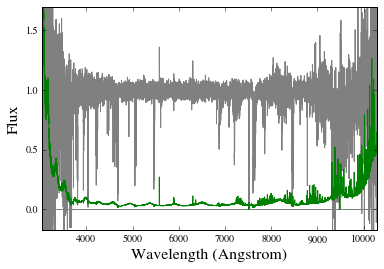

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_b_F.fits.gz for BOSSJ1427-0121
S/N 366.132948268 1 / Angstrom


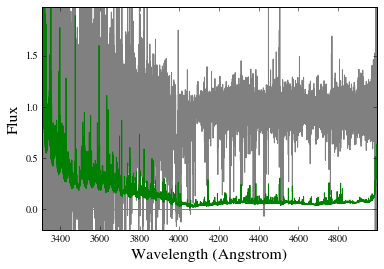

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_4_45/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N 12.3712187215 1 / Angstrom


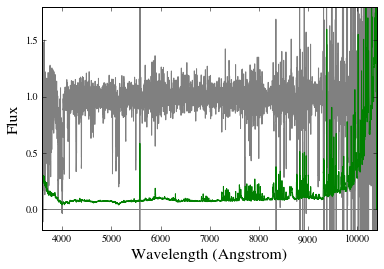

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ150812.80+363530.3_b1200_F.fits.gz for BOSSJ1508+3635
S/N 56.0934093503 1 / Angstrom


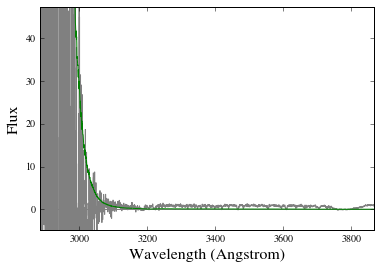

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the D

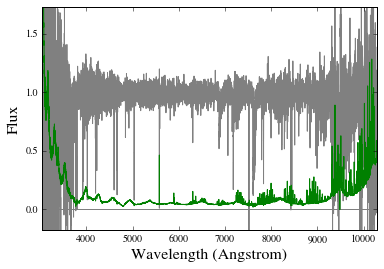

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155946.28+494326.5_b1200_F.fits.gz for APOJ1559+4943
S/N 21.2398400039 1 / Angstrom


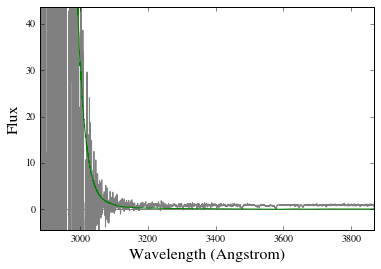

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160546.67+511322.9_b1200_F.fits.gz for BOSSJ1605+5113
S/N 36.2115764484 1 / Angstrom


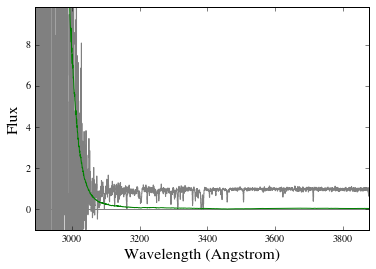

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ161817.31+184230.1.fits for BOSSJ1618+1842
S/N 0.771789010611 1 / Angstrom


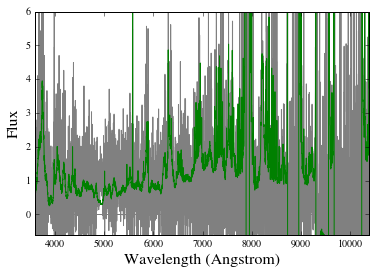

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162737.25+460609.3_F.fits.gz for APOJ1627+4606
S/N 119.453754785 1 / Angstrom


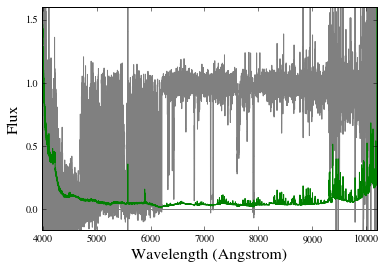

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MODS_redux//./SDSSJ165716.52+310524.5_b_F.fits.gz for BOSSJ1657+3105
S/N 40.6316852534 1 / Angstrom


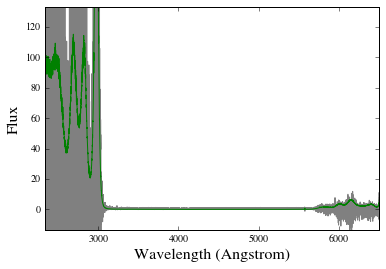

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ225549.55-000927.7.fits for BOSSJ2255-0009
S/N 6.1934643826 1 / Angstrom


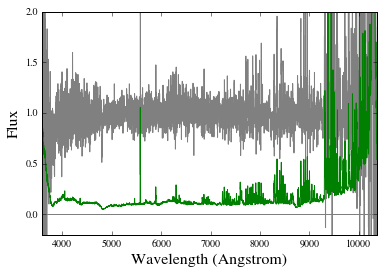

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11


In [21]:
reload(qpqk)
reload(qpq9k)
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA)

## Stack and Plot

### All

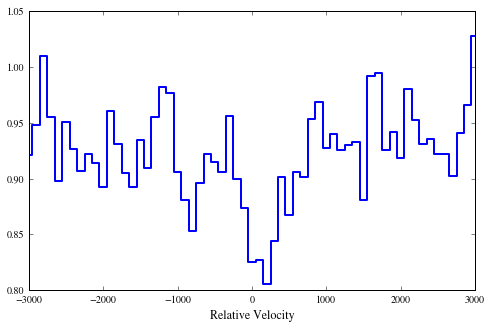

In [24]:
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stack_tup = (fin_velo, stck_img, stck_msk, all_dict)
#
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

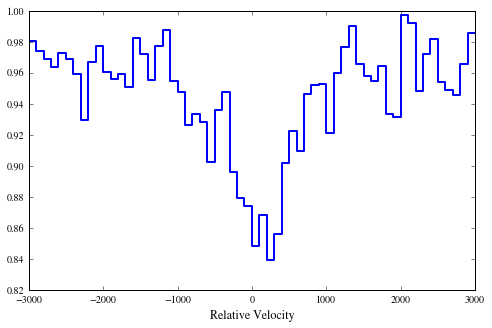

In [44]:
# Mask
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = [27] #27 is DLA, #3 and #13 are noisy 
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
# Stack
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
# Plot
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

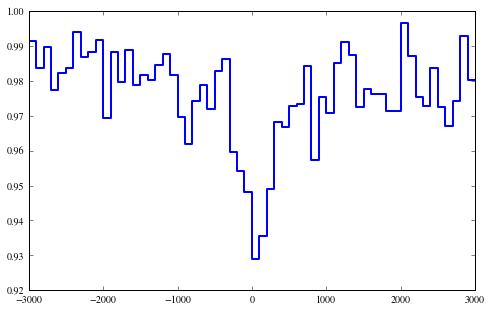

In [38]:
fin_flx_med = np.median(stck_img*stck_msk,0)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo,fin_flx_med,drawstyle='steps-mid',linewidth=2.)

### Centroid 

In [39]:
tau = np.log(1./fin_flx)
print('tau weighted mean on the mean stack, within 2000 km/s=',np.sum(fin_velo[10:51]*tau[10:51])/np.sum(tau[10:51]))
tau_med = np.log(1./fin_flx_med)
print('tau weighted mean on the median stack=',np.sum(fin_velo[10:51]*tau_med[10:51])/np.sum(tau_med[10:51]))

tau weighted mean on the mean stack, within 2000 km/s= 103.345052336 km / s
tau weighted mean on the median stack= 107.397818787 km / s


### Write 

In [19]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zIRMgII_1334.fits'
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
dat = np.transpose([fin_wave,u.Quantity(fin_flx),np.ones_like(fin_flx)*0.1])
ascii.write(dat,'ALIS/QPQ9_zIRMgII_1334.dat',delimiter=' ',format='no_header')

Wrote spectrum to QPQ9_zIRMgII_1334.fits


# Bootstrap

In [27]:
qpq9b.boot_trans(wrest=1334.5323*u.AA,outfil='Output/boot_IRMgII_1334.fits',stack_tup=stack_tup)

Stats:  Mean = 0.237638, RMS=36.7128 for Ntrials=10000
Wrote Output/boot_IRMgII_1334.fits


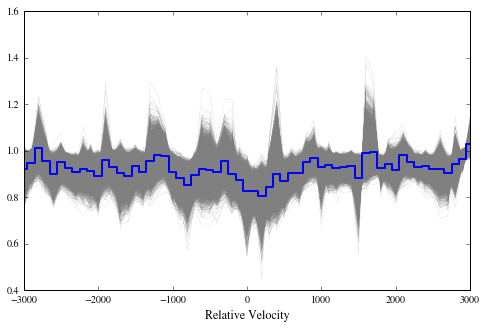

In [28]:
# plot 
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stack_tup = (fin_velo, stck_img, stck_msk, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('Output/boot_IRMgII_1334.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# [OIII] only

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
length of sample after and before culling 13 692
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N 75.0359170696 1 / Angstrom


/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:297: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


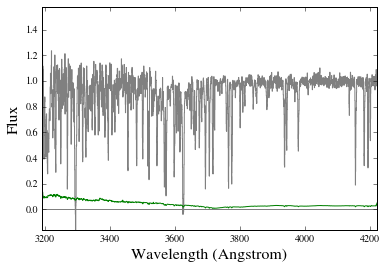

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
S/N 49.1731709574 1 / Angstrom


/Users/lwymarie/python/specdb/specdb/specdb.py:92: UserWarning: Found multiple sources.  Hope you expected that.
  warnings.warn("Found multiple sources.  Hope you expected that.")


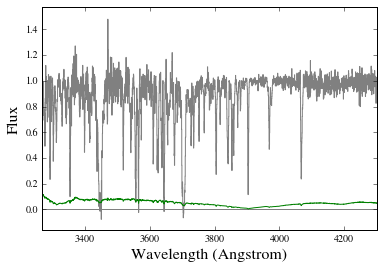

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N 92.9574401142 1 / Angstrom


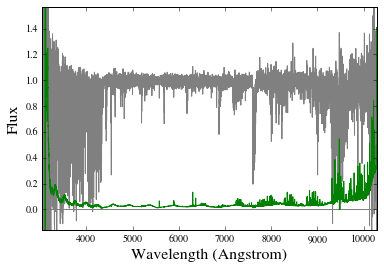

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N 59.8322852369 1 / Angstrom


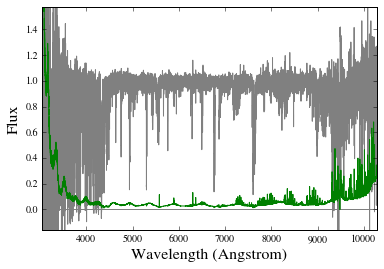

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ093804.84+531743.0_b1200_F.fits.gz for APOJ0938+5317
S/N 74.742049199 1 / Angstrom


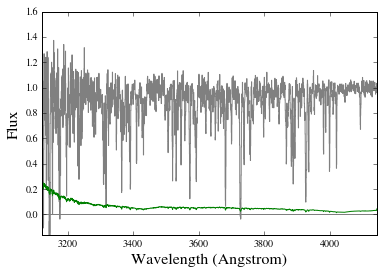

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_6_0/SDSSJ100627.10+480429.9.fits for BOSSJ1006+4804
S/N 16.8652343521 1 / Angstrom


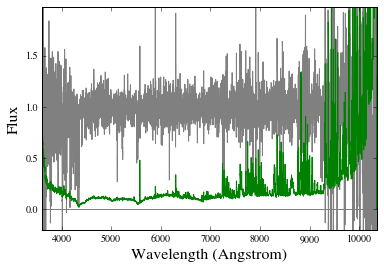

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_b400_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
S/N 64.9694788715 1 / Angstrom


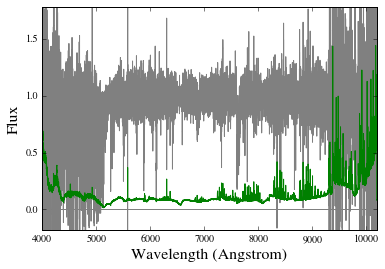

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ114436.66+095904.9_F.fits.gz for BOSSJ1144+0959
S/N 171.406440037 1 / Angstrom


/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:850: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__itruediv__(other)
/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:850: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__itruediv__(other)


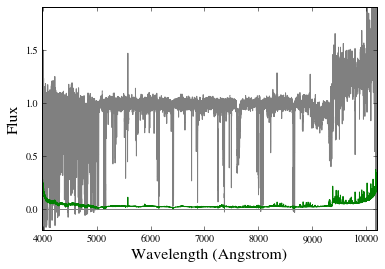

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz for BOSSJ1204+0221
S/N 386.536517315 1 / Angstrom


/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:809: UserWarning: Ignoring NAN in flux
  warnings.warn("Ignoring NAN in flux")


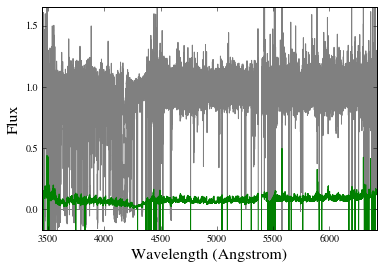

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N 46.3661168562 1 / Angstrom


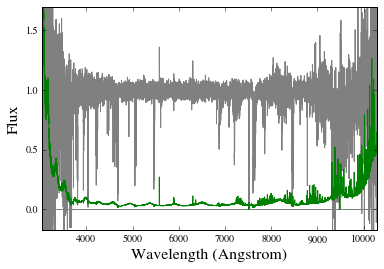

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
S/N is estimated assuming continuum is set properly.
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_b_F.fits.gz for BOSSJ1427-0121
S/N 366.132948268 1 / Angstrom


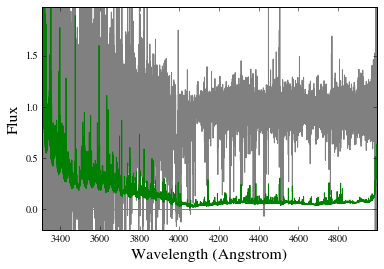

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N 23.4573419536 1 / Angstrom


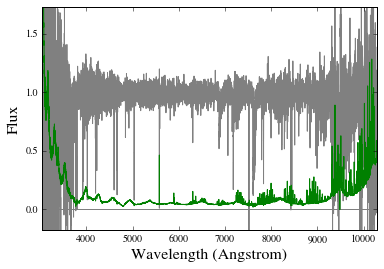

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
S/N is estimated assuming continuum is set properly.
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162737.25+460609.3_F.fits.gz for APOJ1627+4606
S/N 119.453754785 1 / Angstrom


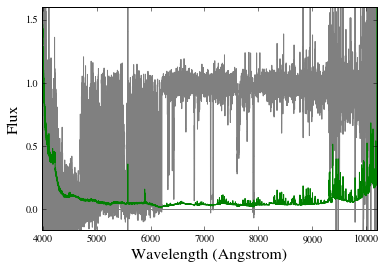

In [3]:
reload(qpqk)
reload(qpq9k)
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,vsig_cut=50*u.km/u.s)

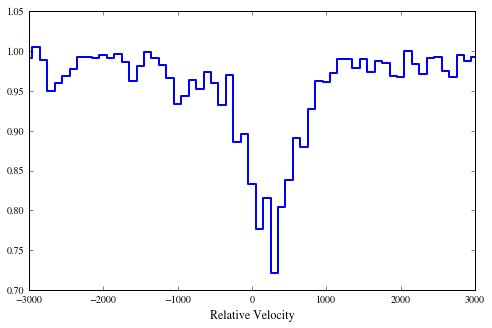

In [4]:
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stack_tup = (fin_velo, stck_img, stck_msk, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

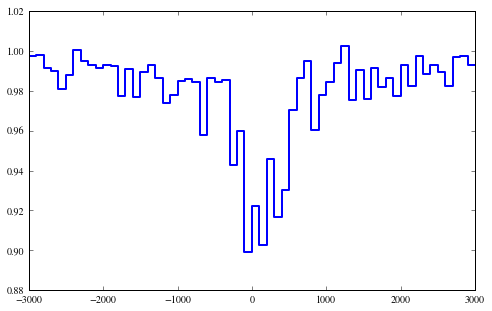

In [23]:
fin_flx_med = np.median(stck_img*stck_msk,0)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo,fin_flx_med,drawstyle='steps-mid',linewidth=2.)

In [24]:
tau = np.log(1./fin_flx)
print('tau weighted mean on the mean stack, within 2000 km/s=',np.sum(fin_velo[10:51]*tau[10:51])/np.sum(tau[10:51]))
tau_med = np.log(1./fin_flx_med)
print('tau weighted mean on the median stack=',np.sum(fin_velo[10:51]*tau_med[10:51])/np.sum(tau_med[10:51]))

tau weighted mean on the mean stack, within 2000 km/s= 144.766019754 km / s
tau weighted mean on the median stack= 102.380279073 km / s


### Write

In [25]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zOIII_1334.fits'
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
dat = np.transpose([fin_wave,u.Quantity(fin_flx),np.ones_like(fin_flx)*0.1])
ascii.write(dat,'ALIS/QPQ9_zOIII_1334.dat',delimiter=' ',format='no_header')

Wrote spectrum to QPQ9_zOIII_1334.fits


# Plot individual spectra 

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
length of sample after and before culling 32 56
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
St

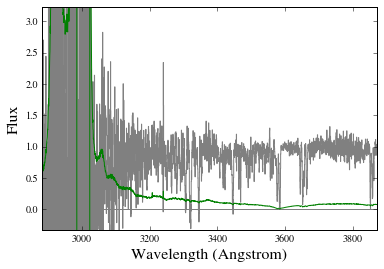

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 4 spectra totalling 0.0004 Gb
Loaded spectra
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTER
S/N: 6.0381

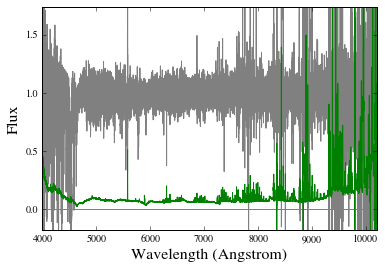

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOO

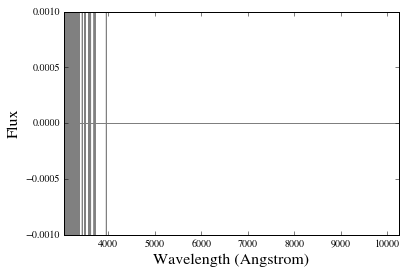

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTE

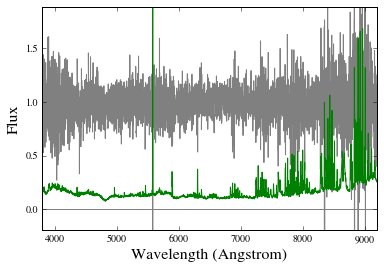

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

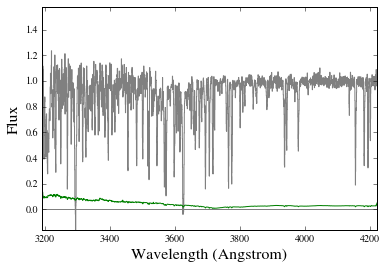

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 4 spectra totalling 0.0004 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTER
S/N: 5.058061

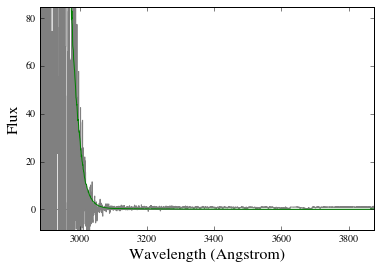

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

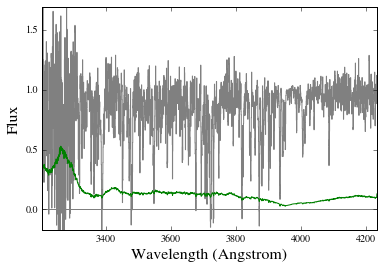

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 4 spectra totalling 0.0004 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOT

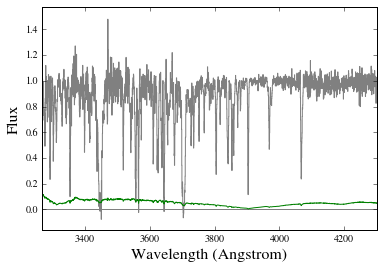

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

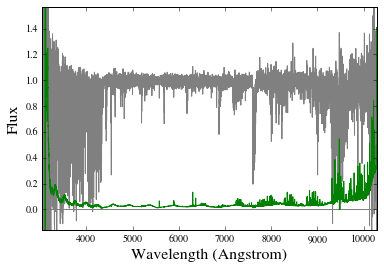

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 4 spectra totalling 0.0004 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
S/N: 8.70759924646 1 / Angstro

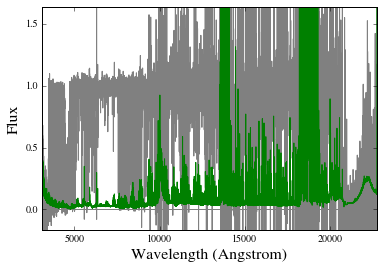

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

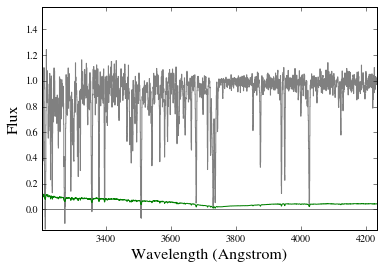

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

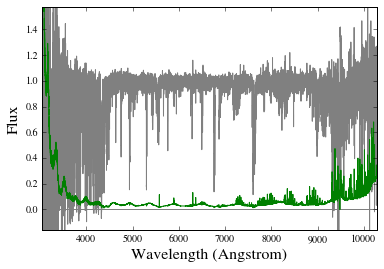

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

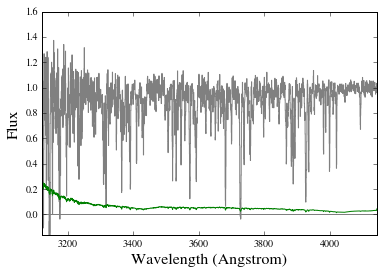

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 4 spectra totalling 0.0004 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in

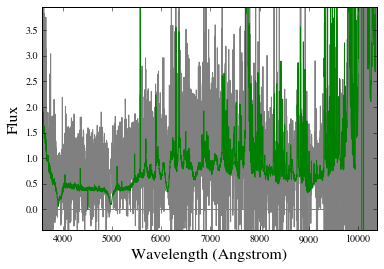

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTE

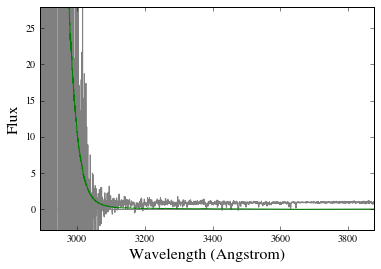

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOT

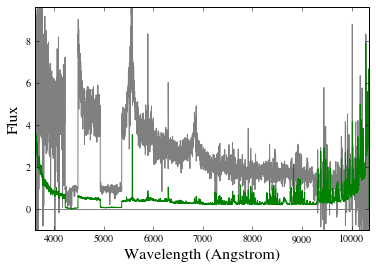

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOT

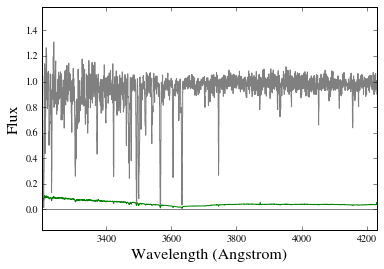

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHO

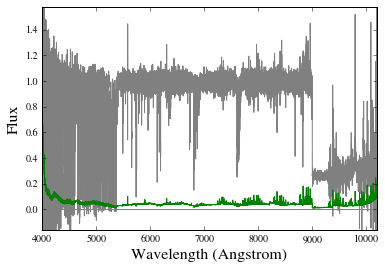

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTER
S/N: 64.9

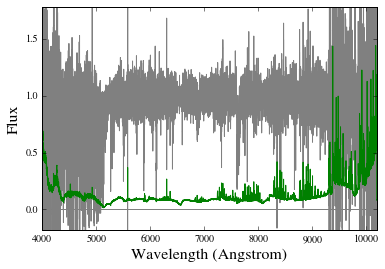

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
S/N: 25.416457

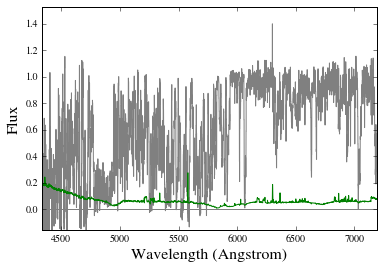

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTER
S/N: 171.4

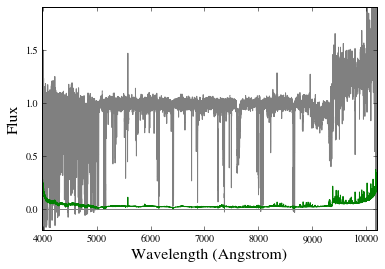

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOO

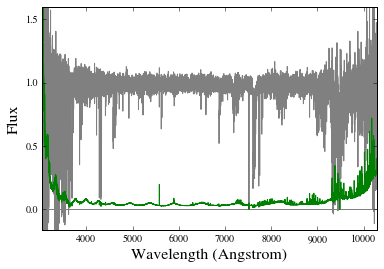

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00144 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTER
No continuu

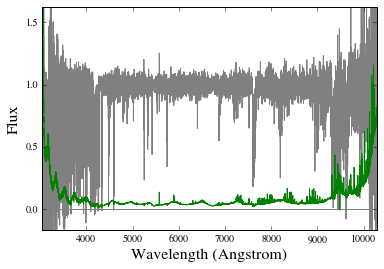

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

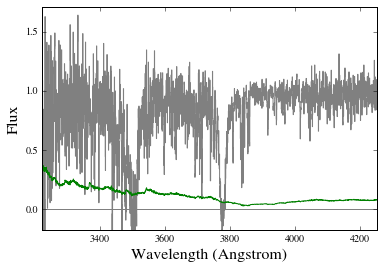

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOT

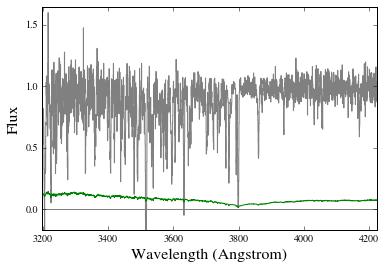

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOO

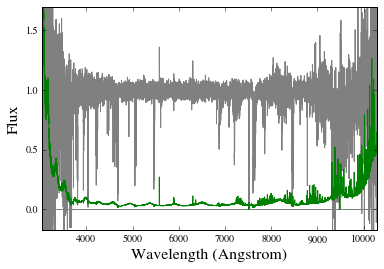

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOTER
No continu

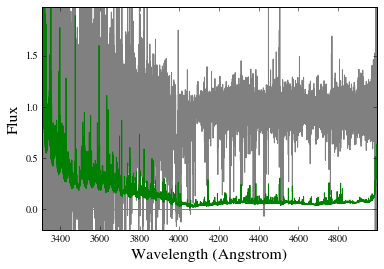

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 8 spectra totalling 0.0008 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOOT

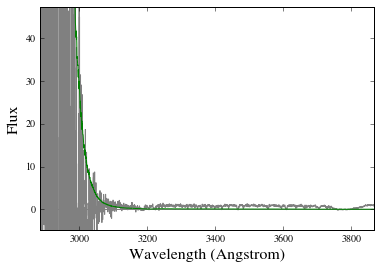

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey XSHOO

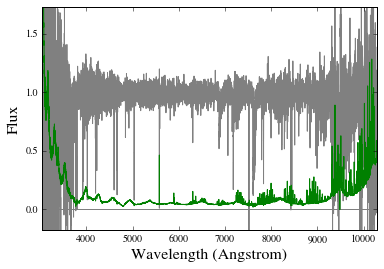

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

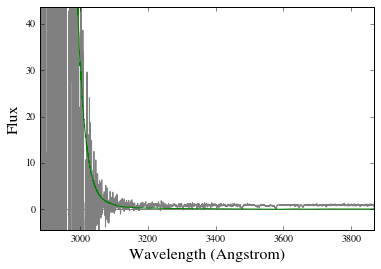

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MODS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

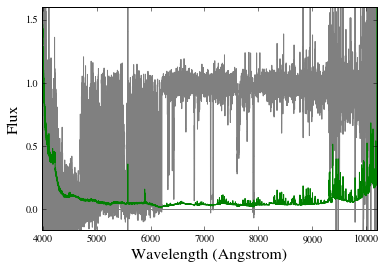

Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the catalog file
Using /Users/lwymarie/Desktop/qpq_optical.hdf5 for the DB file
Available surveys: [u'GMOS', u'MODS', u'HIRES', u'MMT', u'XSHOOTER', u'MIKE', u'BOSS', u'MAGE', u'LRIS', u'SDSS', u'ESI']
Database is QPQ
Created on 2016-Oct-11
Staged 0 spectra totalling 0 Gb
No spectra matching in survey BOSS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey ESI
Staged 0 spectra totalling 0 Gb
No spectra matching in survey GMOS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey HIRES
Staged 0 spectra totalling 0 Gb
No spectra matching in survey LRIS
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MAGE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MIKE
Staged 0 spectra totalling 0 Gb
No spectra matching in survey MMT
Staged 2 spectra totalling 0.00036 Gb
Loaded spectra
Staged 0 spectra totalling 0 Gb
No spectra matching in survey SDSS
Staged 0 spectra totalling 0 Gb
No spectra matching i

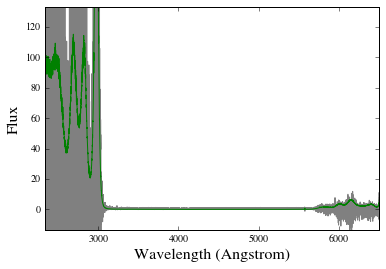

Wrote plt_qpq9_IRMgII_1334_page1.pdf
Wrote plt_qpq9_IRMgII_1334_page2.pdf
Wrote plt_qpq9_IRMgII_1334_page3.pdf


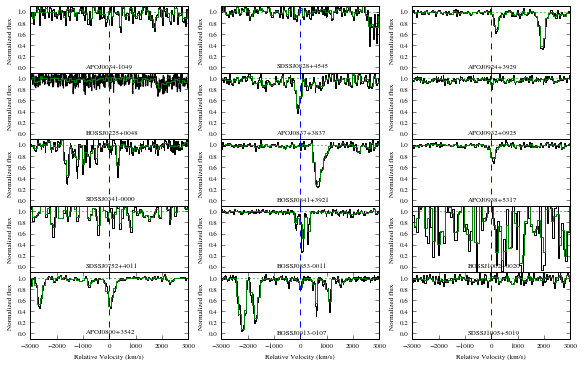

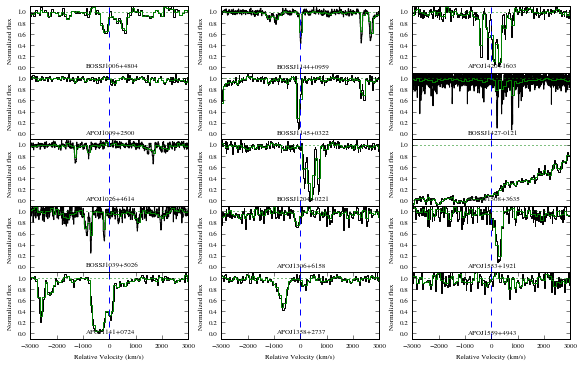

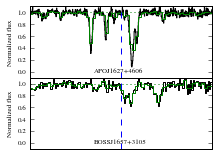

In [8]:
%matplotlib inline
import glob,os,sys,copy 
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k
import astropy.units as u
qpq9k.plt_qpq9(wrest=1334.5323*u.AA)

# Bootstrap

In [5]:
qpq9b.boot_trans(wrest=1334.5323*u.AA,outfil='Output/boot_OIII_1334.fits',stack_tup=stack_tup)

Stats:  Mean = 0.530155, RMS=0.14281 for Ntrials=10000
Wrote Output/boot_OIII_1334.fits


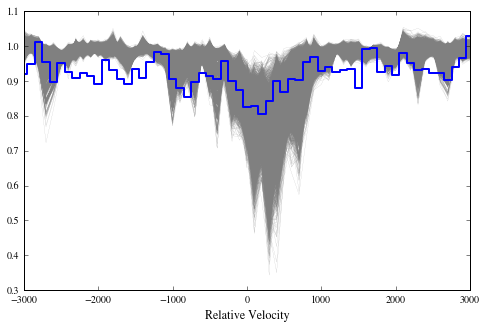

In [29]:
# plot 
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stack_tup = (fin_velo, stck_img, stck_msk, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('Output/boot_OIII_1334.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()